<h1 align="center">Лабораторна робота 3. Регуляризація в задачах машинного навчання. Стохастичний градінтний спуск з регуляризацією
</h1>

<a href="https://github.com/TTelmewk1n">Недолужко Станіслав </a>, 2024

<h2> Завдання для самостійної роботи </h2>

<ol>
    <li>Повторити приклад апроксимації поліномом для довільної функції, що відрізняється від наведеної у прикладі 1. Проаналізувати результати.</li>
    <li>Повторити приклад апроксимації поліномом для довільної функції, що відрізняється від наведеної у прикладі 2. Проаналізувати результати. </li>
    <li> Побудувати бінарний лінійний-класифікатор з L1-регуляризатором згідно з розглянутим прикладом 3 для даних свого варіанту, проаналізувати результати і вивести результати бінарної класифікації на графіку. Імпортувати дані для навчальної вибірки згідно з індивідуальним варіантом (імпорт організувати з файлу).</li>
   <li> Модифікувати код, де замість L1-регуляризатора має використовуватись L2-регуляризатор. Проаналізувати отримані результати і порівняти їх з попередніми результатами.. </li>
    <li> Дати відповіді на контрольні запитання.   </li>
     <li> Відправити результати роботи у файлі lab_3_StudentLastName.ipynb до віддаленого репозиторію на GіtHub.   </li>
</olol>

<h1> Виконання завдання №1</h1>

In [1]:
import numpy as np

# Функція для передбачення значень поліноміальної моделі
def predict_poly(x, koeff):
    res = 0
    # Обчислення значень для кожного степеня x та відповідного коефіцієнта
    xx = [x ** (len(koeff) - n - 1) for n in range(len(koeff))]

    # Обчислення значення полінома за формулою
    for i, k in enumerate(koeff):
        res += k * xx[i]

    return res

# Створення даних для x та y (змінена функція y)
x = np.arange(0, 10.1, 0.1)
y = np.exp(-x) * np.cos(x) # змінена функція

# Обрання кожної другої точки для тренувальних даних
x_train, y_train = x[::2], y[::2]

N = len(x)

# Підгонка полінома 10-го степеня до тренувальних даних
z_train = np.polyfit(x_train, y_train, 10)
print(z_train)


[-4.26298694e-08  2.57492180e-06 -6.78453788e-05  1.01857632e-03
 -9.51761913e-03  5.63689428e-02 -2.02532481e-01  3.66803213e-01
 -1.63276044e-02 -9.96931184e-01  9.99949939e-01]


<h1> Виконання завдання №2</h1>

[ 0.13368772  0.36460586  0.01979658  0.116569   -0.16723302  0.62512335
  0.69735335  0.10319935  0.20365498  0.6819756  -0.14001787  0.35337177
  0.3393097 ]


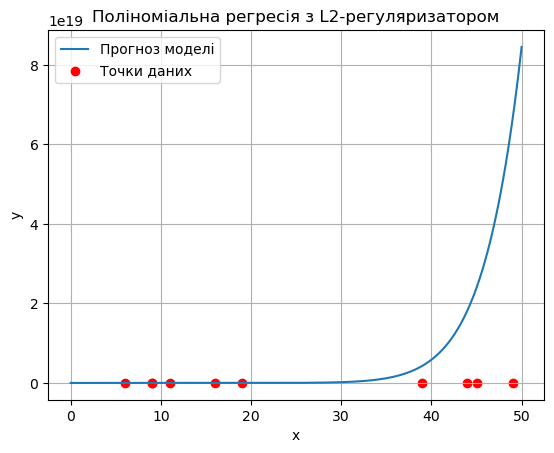

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Дані
x_train_14 = np.array([[16, 49],
                      [45, 28],
                      [11, 26],
                      [49, 27],
                      [44, 7],
                      [9, 33],
                      [19, 5],
                      [9, 49],
                      [6, 22],
                      [39, 32]])
y_train_14 = np.array([1, -1, 1, 1, -1, -1, -1, 1, 1, 1])

# Параметри моделі
N = 13  # розмір простору ознак (степінь полінома N-1)
L = 20  # Параметр регуляризації

# Матриця вхідних векторів
X_train_14 = np.array([[a ** n for n in range(N)] for a in x_train_14[:, 0]])

# Матриця Y для вихідних даних
Y_train_14 = y_train_14

# Матриця lambda*I
IL = np.array([[L if i == j else 0 for j in range(N)] for i in range(N)])
IL[0][0] = 0  # перший коефіцієнт не регуляризується

# Обчислення коефіцієнтів за формулою w = (XT*X + lambda*I)^-1 * XT * Y
A = np.linalg.inv(X_train_14.T @ X_train_14 + IL)
w = Y_train_14 @ X_train_14 @ A
print(w)

# Відображення графіку
x_range = np.linspace(0, 50, 1000)
X_range = np.array([[a ** n for n in range(N)] for a in x_range])

yy = [np.dot(w, x) for x in X_range]
plt.plot(x_range, yy, label='Прогноз моделі')
plt.scatter(x_train_14[:, 0], y_train_14, c='r', label='Точки даних')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Поліноміальна регресія з L2-регуляризатором')
plt.legend()
plt.grid(True)
plt.show()


<h1> Виконання завдання №3</h1>

Вагові коефіцієнти: [-4.64563069e-02  7.21012279e-02 -4.69525245e-07]
Показник якості: 0.6769897112898076


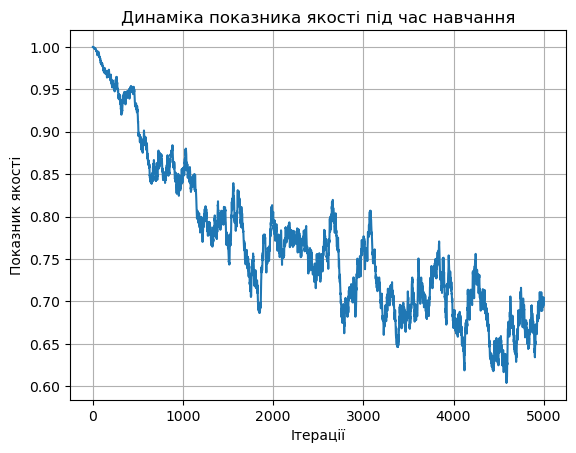

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Сигмоїдна функція втрат
def loss(w, x, y):
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))

# Похідна від сигмоїдальної функції втрат по вектору w
def df(w, x, y):
    L1 = 1.0  # Коефіцієнт L1-регуляризатора
    M = np.dot(w, x) * y
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y + L1 * np.sign(w)

# Навчальна вибірка (з вашого варіанту)
x_train_14 = np.array([[16, 49],
                      [45, 28],
                      [11, 26],
                      [49, 27],
                      [44, 7],
                      [9, 33],
                      [19, 5],
                      [9, 49],
                      [6, 22],
                      [39, 32]])
x_train_14 = np.hstack((x_train_14, np.ones((len(x_train_14), 1))))  # Додаємо стовпець константи
y_train_14 = np.array([1, -1, 1, 1, -1, -1, -1, 1, 1, 1])

fn = len(x_train_14[0])
n_train = len(x_train_14)  # Розмір навчальної вибірки
w = np.zeros(fn)        # Початкові вагові коефіцієнти
nt = 0.00001            # Крок збіжності SGD
lm = 0.01               # Швидкість "забування" для Q
N = 5000                # Кількість ітерацій SGD

Q = np.mean([loss(w, x, y) for x, y in zip(x_train_14, y_train_14)])  # Показник якості
Q_plot = [Q]

# Стохастичний алгоритм градієнтного спуску
for i in range(N):
    k = np.random.randint(0, n_train - 1)       # Випадковий індекс
    ek = loss(w, x_train_14[k], y_train_14[k])        # Визначення втрат для обраного вектора
    w = w - nt * df(w, x_train_14[k], y_train_14[k])  # Коригування вагів за допомогою SGD
    Q = lm * ek + (1 - lm) * Q                  # Перерахунок показника якості
    Q_plot.append(Q)

Q = np.mean([loss(w, x, y) for x, y in zip(x_train_14, y_train_14)]) # Справжнє значення емпіричного ризику після навчання
print("Вагові коефіцієнти:", w)
print("Показник якості:", Q)

# Відображення графіка показника якості
plt.plot(Q_plot)
plt.grid(True)
plt.xlabel('Ітерації')
plt.ylabel('Показник якості')
plt.title('Динаміка показника якості під час навчання')
plt.show()


<h1> Виконання завдання №4</h1>

Вагові коефіцієнти: [-0.08224936  0.09794114 -0.00010863]
Показник якості: 0.6385932414619766


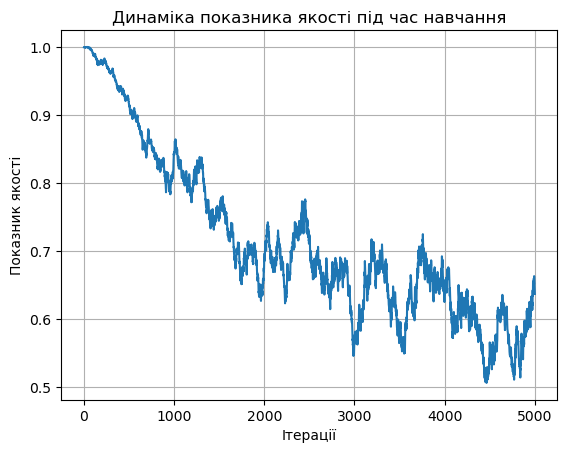

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Сигмоїдна функція втрат
def loss(w, x, y):
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))

# Похідна від сигмоїдальної функції втрат по вектору w
def df(w, x, y):
    L2 = 0.01  # Коефіцієнт L2-регуляризатора
    M = np.dot(w, x) * y
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y + 2 * L2 * w

# Навчальна вибірка з трьома ознаками (третій - константа +1)
x_train = np.array([[16, 49],
                      [45, 28],
                      [11, 26],
                      [49, 27],
                      [44, 7],
                      [9, 33],
                      [19, 5],
                      [9, 49],
                      [6, 22],
                      [39, 32]])
x_train = np.hstack((x_train, np.ones((len(x_train), 1))))  # Додаємо стовпець константи
y_train = np.array([1, -1, 1, 1, -1, -1, -1, 1, 1, 1])

fn = len(x_train[0])
n_train = len(x_train)  # Розмір навчальної вибірки
w = np.zeros(fn)        # Початкові вагові коефіцієнти
nt = 0.00001            # Крок збіжності SGD
lm = 0.01               # Швидкість "забування" для Q
N = 5000                # Кількість ітерацій SGD

Q = np.mean([loss(w, x, y) for x, y in zip(x_train, y_train)])  # Показник якості
Q_plot = [Q]

# Стохастичний алгоритм градієнтного спуску
for i in range(N):
    k = np.random.randint(0, n_train - 1)       # Випадковий індекс
    ek = loss(w, x_train[k], y_train[k])        # Визначення втрат для обраного вектора
    w = w - nt * df(w, x_train[k], y_train[k])  # Коригування вагів за допомогою SGD
    Q = lm * ek + (1 - lm) * Q                  # Перерахунок показника якості
    Q_plot.append(Q)

Q = np.mean([loss(w, x, y) for x, y in zip(x_train, y_train)]) # Справжнє значення емпіричного ризику після навчання
print("Вагові коефіцієнти:", w)
print("Показник якості:", Q)

# Відображення графіка показника якості
plt.plot(Q_plot)
plt.grid(True)
plt.xlabel('Ітерації')
plt.ylabel('Показник якості')
plt.title('Динаміка показника якості під час навчання')
plt.show()


<h1 align="center">Контрольні запитання</h1>

1. **Що таке L2-регуляризатор, і як він використовується в задачах регресії та класифікації?**

<p>L2-регуляризатор, також відомий як "регуляризація Тіхонова" або "регуляризація рідкогоштрафного опису", це метод регуляризації, що використовується в задачах машинного навчання для уникнення перенавчання (overfitting) і контролю за складністю моделі. У регресії L2-регуляризатор додає суму квадратів значень вагових коефіцієнтів до функції втрат, а в класифікації - до штрафу за помилкові класифікації.</p>

2. **Яка основна відмінність між L1- та L2-регуляризаторами у задачах машинного навчання?**

<p>Основна відмінність між L1 та L2 регуляризаторами полягає в тому, як вони штрафують величину коефіцієнтів моделі. L1-регуляризатор додає суму абсолютних значень коефіцієнтів, тоді як L2-регуляризатор додає суму квадратів коефіцієнтів. Це призводить до інших властивостей моделі: L1 може призводити до розріджених векторів ваги, тоді як L2 зазвичай породжує рівномірніші ваги з меншою амплітудою.</p>

3. **Яким чином можна реалізувати простий лінійний бінарний класифікатор за допомогою стохастичного градієнтного спуску в Python?**

<p>Простий лінійний бінарний класифікатор може бути реалізований за допомогою стохастичного градієнтного спуску використовуючи логістичну (сигмоїдальну) функцію втрату.</p>

4. **Що таке стохастичний градієнтний спуск, і в чому полягає його використання для оптимізації функціонала якості?**

<p>Стохастичний градієнтний спуск (SGD) - це метод оптимізації, що використовується для навчання моделей машинного навчання, особливо там, де набір даних дуже великий. Він використовує випадковий підвибірку даних для оцінки градієнта функції втрат. Стратегія спрощує обчислення градієнта та дозволяє збільшити швидкість навчання.</p>

5. **Як впливає використання регуляризаторів (L1 та L2) на процес навчання моделі і на її загальну ефективність в задачах класифікації та регресії?**

<p>Використання регуляризаторів (L1, L2) впливає на навчання моделі шляхом контролю за перенавчанням і створенням більш загальних моделей. Вони допомагають уникнути перенавчання, зменшуючи амплітуду коефіцієнтів моделі, що дозволяє покращити її загальні характеристики та здатність узагальнення до нових даних. Крім того, вони також можуть допомагати управляти ефектом розрідженості в даних та покращувати усталеність та швидкість збіжності алгоритмів оптимізації.</p>    </li>
</ol>
структури даних.i>